# Hypothesis Time!
### The Basics:

- ask questions throughout to make sure they get it! (ie types of errors)
- add packages/resources (statsmodel/sklearn/etc)
- tell them they can either design or implement
- do it and then release notebook afterwards
- go through code line by line
- add definitions earlier
- more graphics!



##### What is a hypothesis test???

"Hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. You’re basically testing whether your results are valid by figuring out the odds that your results have happened by chance. If your results may have happened by chance, the experiment won’t be repeatable and so has little use."

aka: testing to see how reproducable and useful your results are!

<img src = 'problem.jfif' width = 800>

## Simulating A Basic Hypothesis Test with Song data:
We have song data for the top 2018 songs on spotify! Fome kaggle [here](https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018).

Let's say we have a basic claim of most songs are around 3.5 minutes long.

We check the data and see the top 100 songs have an average duration of 3.42 minutes long. Are the top 100 songs shorter than songs on average? How can we tell?

HYPOTHESIS TEST! 

#### First step: Define your hypotheses:

`Null hypothesis: (no difference between groups)` There is no difference between popular songs and other songs in terms of song length!

`Alternative hypothesis: (there is a significant difference)` Popular songs are shorter on average compared to most songs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in file
songs = pd.read_csv("top2018.csv")

In [159]:
songs.head(3)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,happy,label,time
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,0.0,sad,3.316217
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,0.0,sad,2.776767
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,0.0,sad,3.635783


In [160]:
#make the songs into minutes
songs["time"] = songs.duration_ms/1000/60

#song length of top 100 songs
observed = songs["time"].mean()
observed 

3.4201129999999993

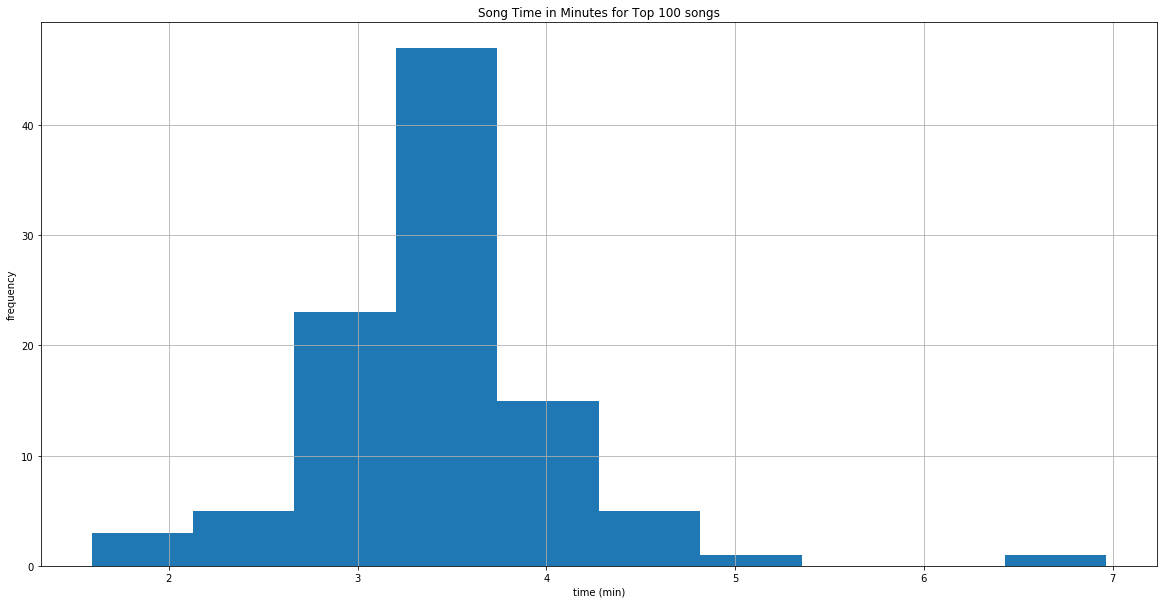

In [171]:
#looking at the original distribution of times (is it normal?)
plt.figure(figsize=(20,10))
songs.time.hist();
plt.title("Song Time in Minutes for Top 100 songs")
plt.xlabel("time (min)")
plt.ylabel("frequency");

In [117]:
#this is bootstrapping!
n=1000
times = []

for i in range(n):
    resample = songs.sample(frac = 1, replace = True).reset_index(drop= True)
    mean_time = (resample.duration_ms/1000/60).mean()
    times.append(mean_time)

Bootstrapping is resampling from your one sample multiple times (with replacement)! This way you're able to "simulate" other samples!

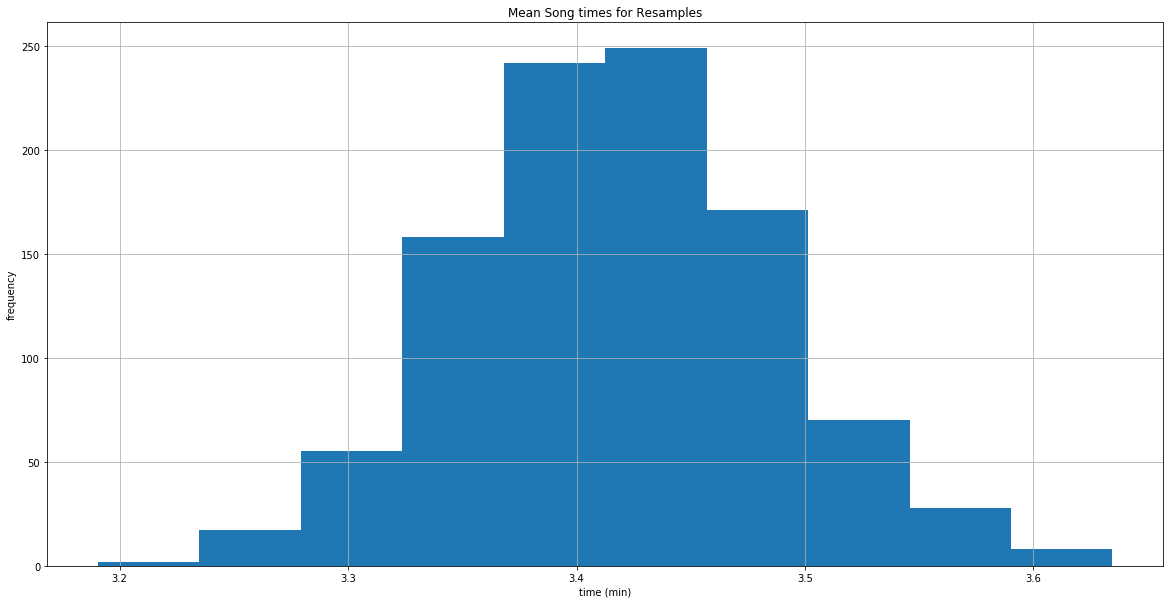

In [169]:
plt.figure(figsize=(20,10))
resample_times = pd.Series(times)
resample_times.hist()
plt.title("Mean Song times for Resamples")
plt.xlabel("time (min)")
plt.ylabel("frequency");


In [143]:
#since this graph is normal, we can create a confidence interval using percentiles!
#95% confidence interval means that 
lower_bound, upper_bound = np.percentile(resample_times, 2.5), np.percentile(resample_times, 97.5)
lower_bound, upper_bound

(3.2872617916666664, 3.557400200000001)

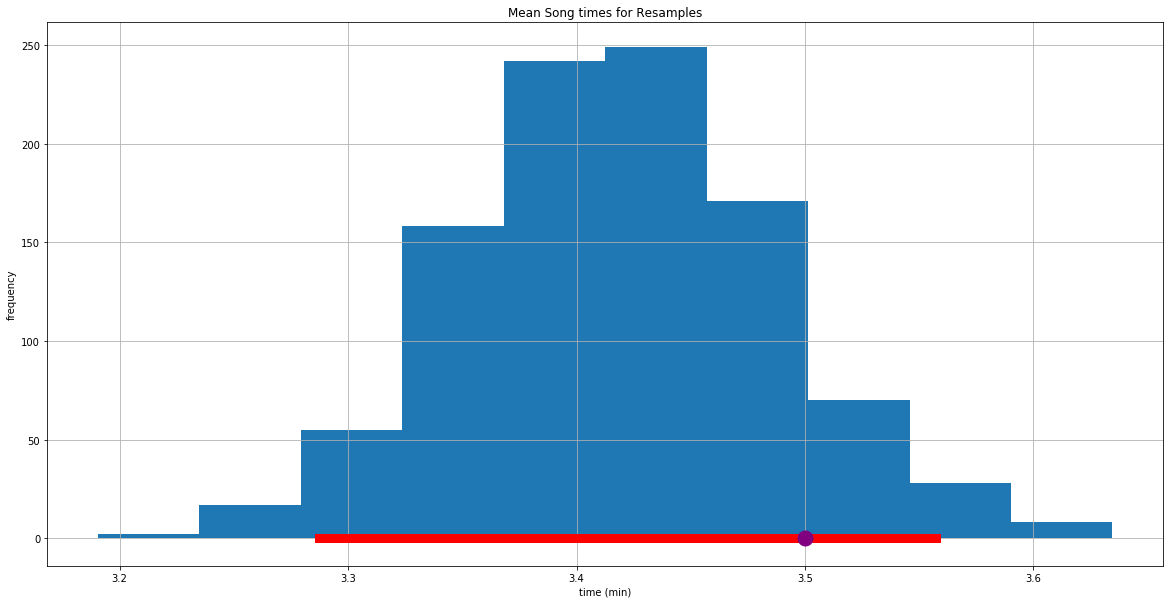

In [170]:
### ADDING IN CONFIDENCE INTERVAL ###
plt.figure(figsize=(20,10))
resample_times = pd.Series(times)
resample_times.hist()
plt.title("Mean Song times for Resamples")
plt.xlabel("time (min)")
plt.ylabel("frequency");

# plotting our guess of 3.5 mins
plt.scatter(3.5, 0, c = 'purple', linewidth = 10, zorder = 3)
# confidence interval
plt.plot([lower_bound, upper_bound], [0,0], c = 'r',linewidth = 9, zorder =2)

### Results:
Since the confidence interval overlaps with the expected value of 3.5 mins (null hyopthesis), we *cannot* reject the null hypothesis that the average time of popular songs is 3.5 mins. 



## This case is a special type of Hypothesis test called permutation tests:
#### Two separate populations: Happy and Sad Songs

A hypothesis is a guess based on what we know about the data (or we see some pattern in the data which leads to further investigation). 

We have data on music, let's see if there's a difference in songs that are "happy" [1] (above median valence) in comparison to songs that are "sad" [0] (below median variance)

### Null Hypothesis:
We expect no significant difference between the two groups, they come from the same population but have differences due to random error. The two groups are "happy" and "sad".

In this example: the difference in the mean danceability of "happy" and "sad" songs is due to random error and the two distributions come from the same population.

### Alternative Hypothesis:
What happens when we reject the null we support the alternative hypothesis, aka the distribution of means come from different underlying populations.

In this example: Since the observed difference in mean danceability is significantly differnet, the "happy" and "sad" songs are from two different populations.

tldr; Are the means different enough to say the happy songs and sad songs have a significant different in danceability? We have to quantify this "different enough" through simulations!

#### Are happy songs more likely to be more danceable?

Let's compare the difference in mean danceability:

In [157]:
# compare mean danceability
songs["happy"] = songs.valence.round()
songs.groupby("happy").agg(["mean"])["danceability"]

,mean
happy,
0.0,0.692055
1.0,0.746289


### Observed Statistic:
The observed statistic is a quantitative measure of how far apart the distributions are.
Ie. at first you may think: you could randomly take one happy song and one sad song and find the difference in danceability. But this method is highly variable (as the danceability can drastically change between different songs).

A better approach: Take the mean of the danceability for the "happy" and "sad" songs. That way you can take into account each song's danceability. Then find the difference in means to see how different the distributions are. 

There are other statistics you can take as well: sum of danceability, TVD, etc.

`sum:` can add up all the danceability for each group and then find the difference

`TVD:` comparing distributions. Ie if you are comparing danceability AND energy for the two groups, you can use TVD.
calculated: the sum of the absolute differences between distributions / 2.

as well as others...



### Test Statistic:
We need to be able to quantify how different the two populations are. A test statistic is one you can compared to the observed value to judge how reasonable the observed statistic is. The more test statistics to compare the better (as there is some randomness involved).

In this example, we took the difference of means for the "happy" and "sad" songs, thus in order to *compare* two values they have to be calculated the same way. So we need to take samples of "happy" and "sad" songs and find the difference in means. 

But how will we do this if we only have the one sample you ask...

In [37]:
#label happy and sad
label = songs["happy"].astype(str).str.replace('0.0', "sad").str.replace("1.0", "happy")
songs["label"] = label

#observed statistic: (using the original data)
observed = songs[["label", "danceability"]].groupby("label").mean().diff().iloc[-1][0]

In [71]:
#one test statistic:
def generate_test(df):
    #make a copy to not alter original data table
    data = df[["label", "danceability"]].copy()
    
    #shuffle the labels
    data = data.assign(shuffled_label = songs["label"].sample(frac =1).reset_index(drop=True))
    
    #get the test statistic by diff of means
    test_stat = data.groupby("shuffled_label").mean().diff().iloc[-1][0]
    
    return test_stat

### Simulations:
We need to simulate the null (test statistic) many times so we can compared them to the observed value to see how far off they are. In order to do this, we shuffle up the labels (happy vs sad) and reassign. 

The main assumption is that if the difference between "happy" and "sad" songs is due to random variance, then shuffling up the labels will give us a difference in danceability that is similar to what we observed. If the two populations are really different, then shuffling will give us a difference smaller than what is observed (since the difference is significant)


In [87]:
test_statistics = []
#need to run it enough times

n=1000
#run this, might take a little while since it's 
for i in range(1000):
    test_statistics.append(generate_test(songs))
    

In [161]:
#little look at what somce of the simulated statistics look like:
test_statistics[:3]

[0.03332121212121186, 0.02394747474747483, -0.028254545454545532]

In [92]:
#the observed value
abs(observed)

0.054234343434343524

### P-value!
The direction of the comparison sign is very important when comparing observed values to the simulated values.

definition of p-value:

"In statistical hypothesis testing, the p-value or probability value is, for a given statistical model, the probability that, when the null hypothesis is true, the statistical summary (such as the absolute value of the sample mean difference between two compared groups) would be greater than or equal to the actual observed results."

tldr; the probability given the null hypothesis is true that we would see the observed value.

In our example: this is the probability that the danceability of happy songs is rated greater than sad songs by at least 0.054.

<img src = 'hyp.jfif' width = 1000 height = 700>

In [90]:
#see how often the difference 
p_value = np.count_nonzero(observed >= test_statistics)/n
p_value

#since the p value < 0.05, this is significant

0.016

Now that we have a p-value, what does it mean? There are standard significant levels of p values to compare to.

*p-value = 0.05*: 1/20 chance of seeing this observed value given the two groups were from the same population.
This is statistically significant

*p-value = 0.001*: statistically highly significant 1/1,000 chance of occuring given the null hypothesis is true.

If you think about it, if the chance of something happening is so miniscule, it probably means our assumption (the null hypothesis) is incorrect. Thus, if the p-value is < 0.05 (using normal standard) then we reject the null hypothesis and accept the alternative hypothesis as being more likely!


## NOTE: 
you cannot *conclude* the alternative hypothesis is correct. It's still a probability so at best you can accept the alternative hypothesis.

### Types of Errors:
There are two types of main errors: Type I and Type II. 

Type I is when you reject the null hypothesis when it's actually true.
Type II is when you accept the null hypothesis when it's actually false.

Based on what you're trying to determine, one error can be worse than the other. It's just dependent on the data.
Aka, if you have a higher than average blood pressure being safe and getting it checked out even if the results aren't statistically significant may be a good idea.

Remember: p is just a probability! If you have 20 trials the probability is that `one` of them will probably be 'significant'. Just be careful!

<img src = 'pval.PNG' width = 1100>

## In Conclusion: Hypothesis testing
1. need hypothesis
    - null and alternative
2. determine test statistic
    - tvd, means, etc.
2. need to simulate the null
    - simulate test statistic
3. look at curve
    - look at observed value vs test statistics
4. calculate p value and/or confidence interval
5. look at error 
    - understand the significance of the results

### Future Direction:

There are lots of cool python statistics packages as well (to speed up the process)! Click the link to head to the documentation!

- [scipy](https://docs.scipy.org/doc/scipy/reference/)
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html)
- [sklearn](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html)

<img src = 'pvalue.jpg' width = 500>

### References:
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/null-hypothesis/
https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html
https://www.statsdirect.com/help/basics/p_values.htm
https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8
https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a
https://www.pinterest.ca/pin/214132157265291627/
https://github.com/learn-co-students/dsc-0-09-19-1-sample-z-test-readme-online-ds-sp-000